In [23]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


In [24]:
def calculate_principal_component(image):
    pca = PCA(2)
    return pca.fit_transform(image)



def extract_image_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    features = [np.mean(image), np.std(image), calculate_principal_component(image)]
    return features

image_features_list = []
class_labels_list = []

data_directory = './dataset/'

#missing O

directories = ['@', "&", "#", "$", 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z', '0','1','2','3','4','5','6','7','8','9']

for class_label, class_name in enumerate(directories):
    class_path = os.path.join(data_directory, class_name)


    for image_file in os.listdir(class_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(class_path, image_file)
            features = extract_image_features(image_path)
            image_features_list.append(features)
            class_labels_list.append(class_label)



c:\Users\Kareem\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_pca.py:527: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


C:\Users\Kareem\AppData\Local\Temp\ipykernel_13688\2510737166.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  converted_data = np.array(image_features_list)[:, 2]


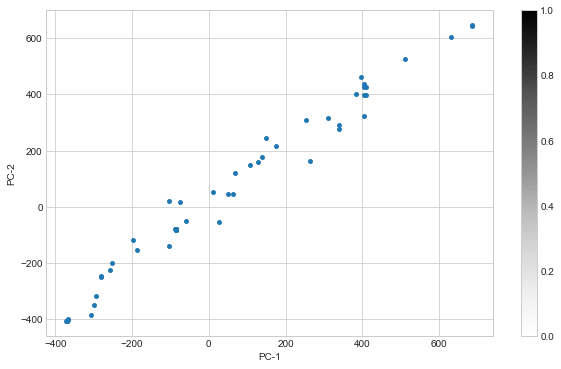

In [33]:
converted_data = np.array(image_features_list)[:, 2] 

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[0], converted_data[1], s = 15,
            cmap = c_map )
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()